In [18]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import math
import sys, os

In [19]:
file_pc = Dataset("../../../../results/23_03_01_RUN_ARTICLE1_S2_100km_Galileo_E4_flyby/100km_run_final_19_04_23_atm_et_resis/t00600/Thew_19_04_23_t00600.nc")
var_nc_pc = file_pc.variables

file_oc = Dataset("../../../../results/23_03_01_RUN_ARTICLE1_S2_100km_Galileo_E4_flyby/open_cond_no_smoothing/Thew_15_05_23_t00600.nc")
var_nc_oc = file_oc.variables

centr_pc      = var_nc_pc['s_centr'][:]
radius_pc     = var_nc_pc['r_planet'][:]
gs         = var_nc_pc['gstep'][:]
Ne_pc = var_nc_pc["Density"][:]
Ux_pc = var_nc_pc["Ux"][:]
nc_pc = [len(Ne_pc[0][0]), len(Ne_pc[0]), len(Ne_pc)]

centr_oc      = var_nc_oc['s_centr'][:]
radius_oc     = var_nc_oc['r_planet'][:]
Ne_oc = var_nc_oc["Density"][:]
Ux_oc = var_nc_oc["Ux"][:]
nc_oc = [len(Ne_oc[0][0]), len(Ne_oc[0]), len(Ne_oc)]

C:\Users\BASKEV~1\AppData\Local\Temp/ipykernel_38792/3540624267.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  centr_pc      = var_nc_pc['s_centr'][:]
C:\Users\BASKEV~1\AppData\Local\Temp/ipykernel_38792/3540624267.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  radius_pc     = var_nc_pc['r_planet'][:]
C:\Users\BASKEV~1\AppData\Local\Temp/

In [20]:
# -- Creation of axis values centered on the planet ( normalized to planet radius)
X_XY_pc, Y_XY_pc = np.meshgrid(np.arange(0,(nc_pc[0])*gs[0],gs[0]),np.arange(0,(nc_pc[1])*gs[1],gs[1]))
X_XY_pc = np.divide(np.matrix.transpose(X_XY_pc), radius_pc) - np.divide((centr_pc[0]+0.5*gs[0])*np.ones((nc_pc[0],nc_pc[1])), radius_pc)
Y_XY_pc = np.divide(np.matrix.transpose(Y_XY_pc), radius_pc) - np.divide((centr_pc[1]+0.5*gs[1])*np.ones((nc_pc[0],nc_pc[1])), radius_pc)

X_XZ_pc, Z_XZ_pc = np.meshgrid(np.arange(0,(nc_pc[0])*gs[0],gs[0]),np.arange(0,(nc_pc[2])*gs[2],gs[2]))
X_XZ_pc = np.divide(np.matrix.transpose(X_XZ_pc), radius_pc) - np.divide((centr_pc[0]+0.5*gs[0])*np.ones((nc_pc[0],nc_pc[2])), radius_pc)
Z_XZ_pc = np.divide(np.matrix.transpose(Z_XZ_pc), radius_pc) - np.divide((centr_pc[2]+0.5*gs[2])*np.ones((nc_pc[0],nc_pc[2])), radius_pc)

Y_YZ_pc, Z_YZ_pc = np.meshgrid(np.arange(0,(nc_pc[1])*gs[1],gs[1]),np.arange(0,(nc_pc[2])*gs[2],gs[2]))
Y_YZ_pc = np.divide(np.matrix.transpose(Y_YZ_pc), radius_pc) - np.divide((centr_pc[1]+0.5*gs[1])*np.ones((nc_pc[1],nc_pc[2])), radius_pc)
Z_YZ_pc = np.divide(np.matrix.transpose(Z_YZ_pc), radius_pc) - np.divide((centr_pc[2]+0.5*gs[2])*np.ones((nc_pc[1],nc_pc[2])), radius_pc)



# planet center in cell number (NB: cell number start at 0
icentr_pc = int(np.fix(centr_pc[0]/gs[0]))-1
jcentr_pc = int(np.fix(centr_pc[1]/gs[1]))-1
kcentr_pc = int(np.fix(centr_pc[2]/gs[2]))-1
iwake_pc = int(icentr_pc + np.fix(1.5*radius_pc/gs[0]))

In [21]:
# -- Creation of axis values centered on the planet ( normalized to planet radius)
X_XY_oc, Y_XY_oc = np.meshgrid(np.arange(0,(nc_oc[0])*gs[0],gs[0]),np.arange(0,(nc_oc[1])*gs[1],gs[1]))
X_XY_oc = np.divide(np.matrix.transpose(X_XY_oc), radius_oc) - np.divide((centr_oc[0]+0.5*gs[0])*np.ones((nc_oc[0],nc_oc[1])), radius_oc)
Y_XY_oc = np.divide(np.matrix.transpose(Y_XY_oc), radius_oc) - np.divide((centr_oc[1]+0.5*gs[1])*np.ones((nc_oc[0],nc_oc[1])), radius_oc)

X_XZ_oc, Z_XZ_oc = np.meshgrid(np.arange(0,(nc_pc[0])*gs[0],gs[0]),np.arange(0,(nc_oc[2])*gs[2],gs[2]))
X_XZ_oc = np.divide(np.matrix.transpose(X_XZ_oc), radius_oc) - np.divide((centr_oc[0]+0.5*gs[0])*np.ones((nc_oc[0],nc_oc[2])), radius_oc)
Z_XZ_oc = np.divide(np.matrix.transpose(Z_XZ_oc), radius_oc) - np.divide((centr_oc[2]+0.5*gs[2])*np.ones((nc_oc[0],nc_oc[2])), radius_oc)

Y_YZ_oc, Z_YZ_oc = np.meshgrid(np.arange(0,(nc_oc[1])*gs[1],gs[1]),np.arange(0,(nc_oc[2])*gs[2],gs[2]))
Y_YZ_oc = np.divide(np.matrix.transpose(Y_YZ_oc), radius_oc) - np.divide((centr_oc[1]+0.5*gs[1])*np.ones((nc_oc[1],nc_oc[2])), radius_oc)
Z_YZ_oc = np.divide(np.matrix.transpose(Z_YZ_oc), radius_oc) - np.divide((centr_oc[2]+0.5*gs[2])*np.ones((nc_oc[1],nc_oc[2])), radius_oc)



# planet center in cell number (NB: cell number start at 0
icentr_oc = int(np.fix(centr_oc[0]/gs[0]))-1
jcentr_oc = int(np.fix(centr_oc[1]/gs[1]))-1
kcentr_oc = int(np.fix(centr_oc[2]/gs[2]))-1
iwake_oc = int(icentr_oc + np.fix(1.5*radius_oc/gs[0]))

In [22]:
def get_XY_plan(cube,nc,k):
    C_XY        = np.zeros((nc[0],nc[1]))
    C_XY[:,:]   = np.matrix.transpose(cube[k,:,:])
    return C_XY

def get_XZ_plan(cube,nc,j):
    C_XZ        = np.zeros((nc[0],nc[2]))
    C_XZ[:,:]   = np.matrix.transpose(cube[:,j,:])
    return C_XZ

def get_YZ_plan(cube,nc,i):
    C_YZ        = np.zeros((nc[1],nc[2]))
    C_YZ[:,:]   = np.matrix.transpose(cube[:,:,i])
    return C_YZ

def plot_fig(x_axis,y_axis,plan,lim_plan,lim_x,lim_y,cmap,fig_name="",fig_title="",ax_labels={"x":"","y":""},fig_size=[6,9.5],is_streamplot=False,X_norm=None,Y_norm=None,StreamX=None,StreamY=None,planet=True):
    # planet drawing
    theta = np.divide(2.0*math.pi*np.arange(1,101, 1.0), 100.0)
    xp = np.cos(theta)
    yp = np.sin(theta)

    fig, ax = plt.subplots(figsize=fig_size)
    c = ax.pcolor(x_axis, y_axis, plan, vmin=lim_plan["min"], vmax=lim_plan["max"], cmap=cmap,shading='auto')
    fig.colorbar(c, ax=ax)
    if is_streamplot:
        ax.streamplot(np.transpose(X_norm),Y_norm,np.transpose(StreamX),np.transpose(StreamY),color="white",density=4, arrowstyle='->', arrowsize=1.,linewidth=1)
    if planet:
        ax.plot(xp,yp,c="black")
        ax.fill(xp,yp,c="white")
    
    ax.set_xlim(lim_x["min"],lim_x["max"])
    ax.set_ylim(lim_y["min"],lim_y["max"])

    plt.title(fig_title)#,'fontsize',12,'fontweight','b');
    ax.set_xlabel(ax_labels["x"])#,'fontsize',12,'fontweight','b');
    ax.set_ylabel(ax_labels["y"])#,'fontsize',12,'fontweight','b');

    # plt.savefig(fig_name)

    plt.show()

In [23]:
Ux_pc_XY = get_XY_plan(Ux_pc,nc_pc,kcentr_pc)
Ux_pc_XZ = get_XZ_plan(Ux_pc,nc_pc,jcentr_pc)
Ux_pc_YZ = get_YZ_plan(Ux_pc,nc_pc,icentr_pc)

Ux_oc_XY = get_XY_plan(Ux_oc,nc_oc,kcentr_oc)
Ux_oc_XZ = get_XZ_plan(Ux_oc,nc_oc,jcentr_oc)
Ux_oc_YZ = get_YZ_plan(Ux_oc,nc_oc,icentr_oc)

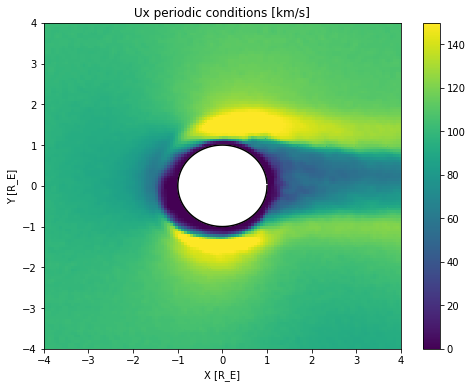

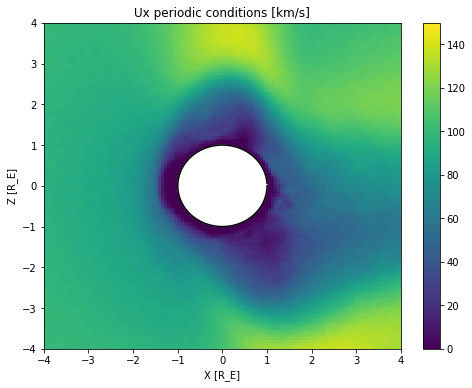

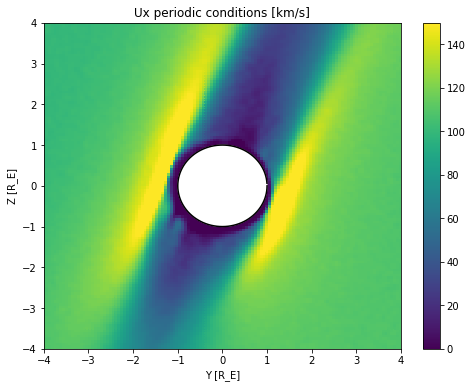

In [24]:
colmap = ["jet","Greens_r","viridis"]
ncol = 2  # numero de la colormap
fig_size = [[6,9.5],[6,7.5],[8,6],[10,6]] #differentes tailles de fenetres
figsize_Xnum = 2  #numero de la taille de la fenetre pour les plans XZ et XY
figsize_Ynum = 2  #numero de la taille de la fenetre pour les plans YZ

lim_Ne={"min":0, "max":150}
lim_X = {"min":-4.0, "max":4}
lim_Y = {"min":-4.0, "max":4}
lim_Z = {"min":-4.0, "max":4}

ax_labels = {"x":"X [R_E]", "y":"Y [R_E]"}
fig_title = "Ux periodic conditions [km/s]"
fig_name = "Dn_ne_evolution_XY_Europa_E4_flyby.png"
plot_fig(X_XY_pc,Y_XY_pc,Ux_pc_XY,lim_Ne,lim_X,lim_Y,colmap[ncol],fig_name,fig_title,ax_labels,fig_size[figsize_Xnum])

ax_labels = {"x":"X [R_E]", "y":"Z [R_E]"}
fig_title = "Ux periodic conditions [km/s]"
fig_name = "Dn_ne_evolution_XZ_Europa_E4_flyby.png"
plot_fig(X_XZ_pc,Z_XZ_pc,Ux_pc_XZ,lim_Ne,lim_X,lim_Z,colmap[ncol],fig_name,fig_title,ax_labels,fig_size[figsize_Xnum])

ax_labels = {"x":"Y [R_E]", "y":"Z [R_E]"}
fig_title = "Ux periodic conditions [km/s]"
fig_name = "Dn_ne_evolution_YZ_Europa_E4_flyby.png"
plot_fig(Y_YZ_pc,Z_YZ_pc,Ux_pc_YZ,lim_Ne,lim_Y,lim_Z,colmap[ncol],fig_name,fig_title,ax_labels,fig_size[figsize_Xnum])


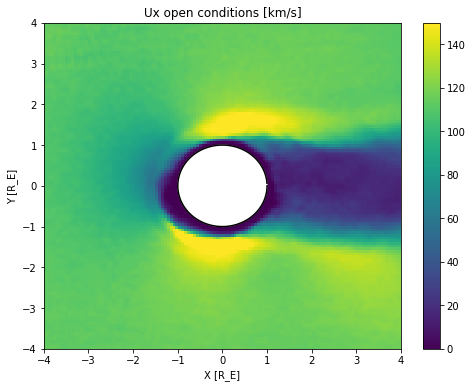

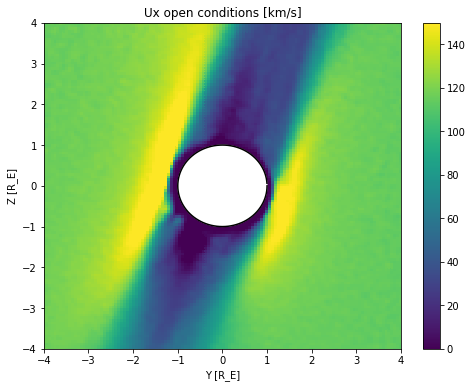

In [25]:
ax_labels = {"x":"X [R_E]", "y":"Y [R_E]"}
fig_title = "Ux open conditions [km/s]"
fig_name = "Dn_ne_evolution_XY_Europa_E4_flyby.png"
plot_fig(X_XY_oc,Y_XY_oc,Ux_oc_XY,lim_Ne,lim_X,lim_Y,colmap[ncol],fig_name,fig_title,ax_labels,fig_size[figsize_Xnum])

ax_labels = {"x":"X [R_E]", "y":"Z [R_E]"}
fig_title = "Ux open conditions [km/s]"
fig_name = "Dn_ne_evolution_XZ_Europa_E4_flyby.png"
plot_fig(X_XZ_oc,Z_XZ_oc,Ux_oc_XZ,lim_Ne,lim_X,lim_Z,colmap[ncol],fig_name,fig_title,ax_labels,fig_size[figsize_Xnum])

ax_labels = {"x":"Y [R_E]", "y":"Z [R_E]"}
fig_title = "Ux open conditions [km/s]"
fig_name = "Dn_ne_evolution_YZ_Europa_E4_flyby.png"
plot_fig(Y_YZ_oc,Z_YZ_oc,Ux_oc_YZ,lim_Ne,lim_Y,lim_Z,colmap[ncol],fig_name,fig_title,ax_labels,fig_size[figsize_Xnum])

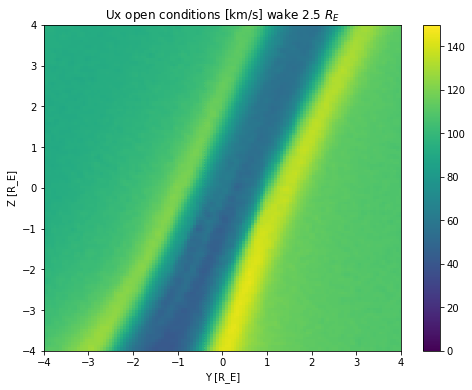

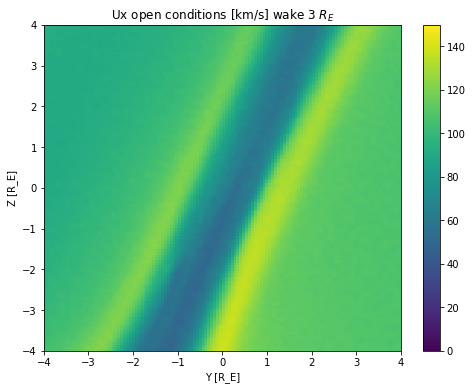

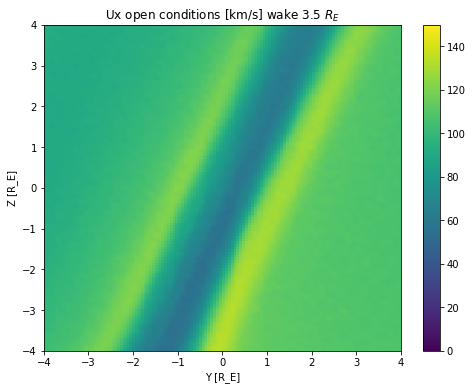

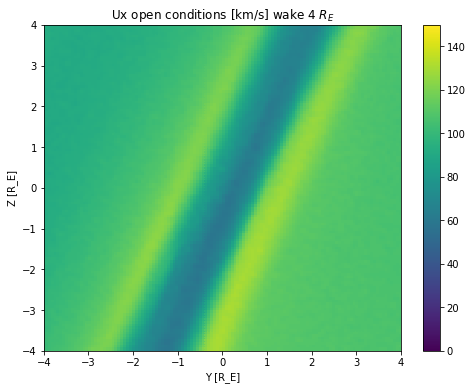

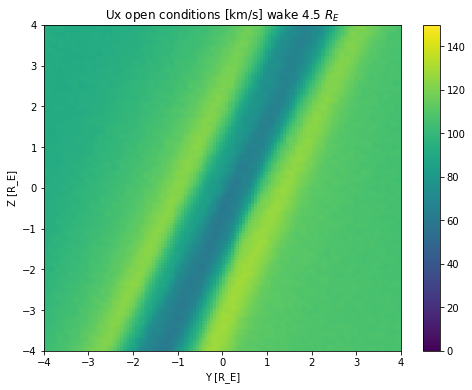

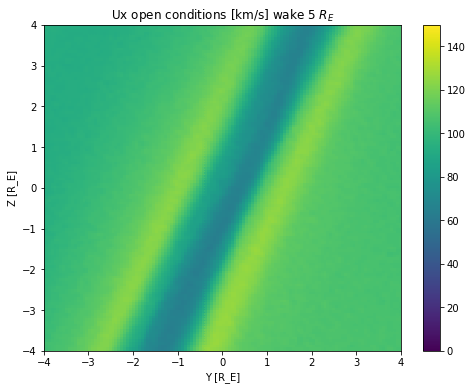

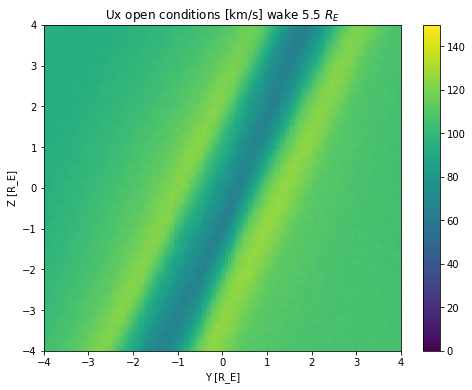

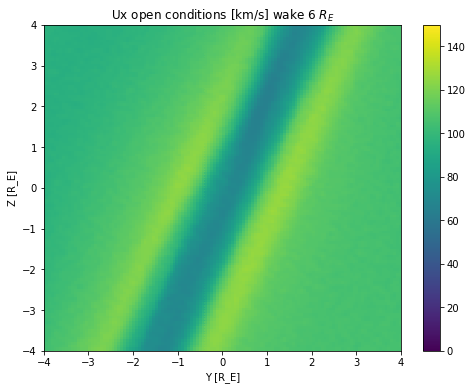

In [27]:
vals = [1.5,2,2.5,3,3.5,4,4.5,5,5.5,6]
for i in vals:
    iwake_pc = int(icentr_pc + np.fix(i*radius_pc/gs[0]))
    Ux_pc_YZ = get_YZ_plan(Ux_pc,nc_pc,iwake_pc)
    ax_labels = {"x":"Y [R_E]", "y":"Z [R_E]"}
    fig_title = "Ux conditions peridoci [km/s] wake "+str(i)+" $R_E$"
    fig_name = "Dn_ne_evolution_YZ_Europa_E4_flyby.png"
    plot_fig(Y_YZ_pc,Z_YZ_pc,Ux_pc_YZ,lim_Ne,lim_Y,lim_Z,colmap[ncol],fig_name,fig_title,ax_labels,fig_size[figsize_Xnum],planet=False)

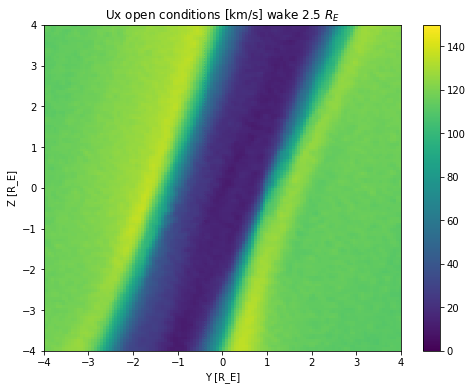

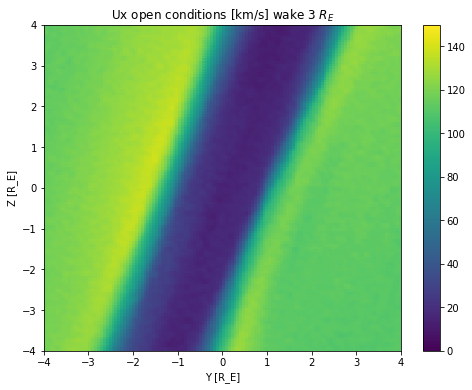

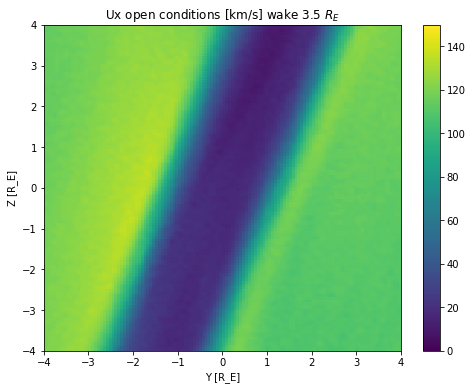

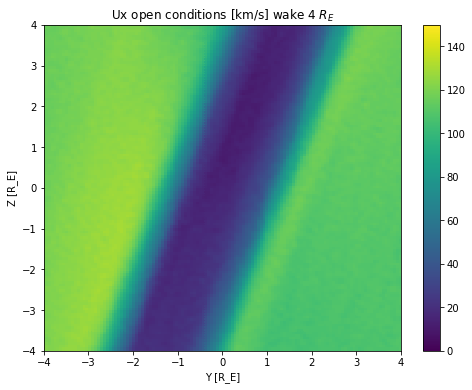

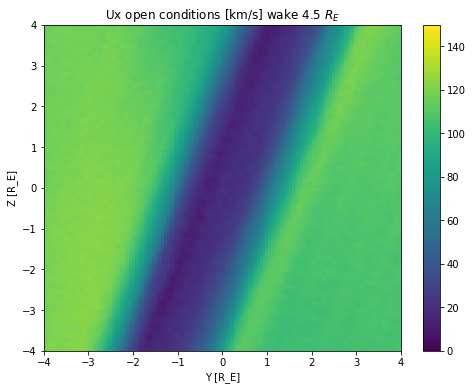

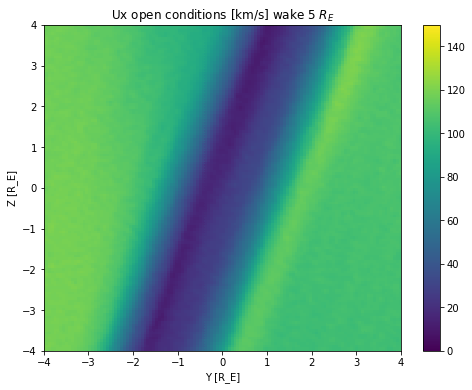

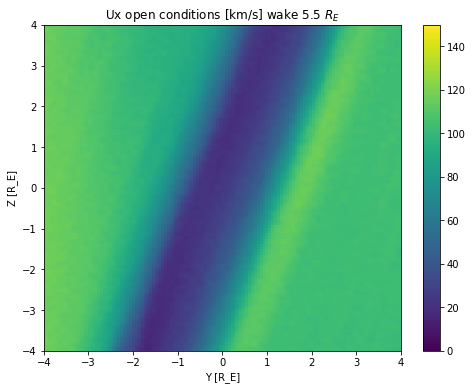

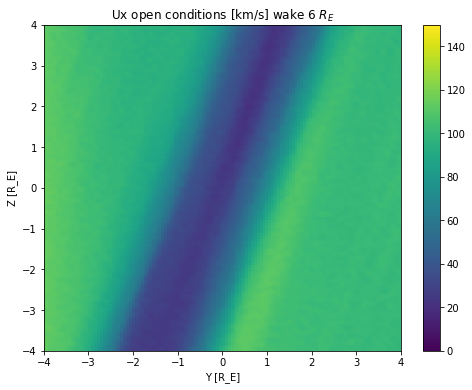

In [26]:
vals = [1.5,2,2.5,3,3.5,4,4.5,5,5.5,6]
for i in vals:
    iwake_oc = int(icentr_oc + np.fix(i*radius_oc/gs[0]))
    Ux_oc_YZ = get_YZ_plan(Ux_oc,nc_oc,iwake_oc)
    ax_labels = {"x":"Y [R_E]", "y":"Z [R_E]"}
    fig_title = "Ux open conditions [km/s] wake "+str(i)+" $R_E$"
    fig_name = "Dn_ne_evolution_YZ_Europa_E4_flyby.png"
    plot_fig(Y_YZ_oc,Z_YZ_oc,Ux_oc_YZ,lim_Ne,lim_Y,lim_Z,colmap[ncol],fig_name,fig_title,ax_labels,fig_size[figsize_Xnum],planet=False)